# Nasdaq vs S&P500

<b> YouTube Tutorial </b> (Published: Mar 1, 2022): https://youtu.be/BMr4VfpmeVc

### Trading Hypothesis:
- If Interest Rates Rise, Technology Companies valuations will be impacted worse than the broader stock market.

#### Why? - You should complete your own historical analysis on market analysts deflation on valuations of different company sectors based on historical rate hikes.
This is not investment advice! But let's say I do my research and I conclude:
- Technology companies are more sensitive to interest rates due to the influence of current DCF valuations based on the expectation of high growth rates in free cash flow in the future.

In [ ]:
## This is required for pandas_datareader on google colab - then you need to restart runtime
!pip install --upgrade pandas_datareader

     |████████████████████████████████| 109 kB 4.5 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


### How could I benefit from this view?

The NASDAQ-100 Index is heavily weighted to the technology sector. The S&P 500 Index, by contrast, is recognized as having a broad, diversified constituency and represents the broad market. What makes this type of trade possible is both of these indices, while slightly different, have a high degree of price correlation.

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [ ]:
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    log_returns = np.log(stockData) - np.log(stockData.shift(1))
    covMatrix = log_returns.cov()
    corMatrix = log_returns.corr()
    return stockData, log_returns, covMatrix, corMatrix

indices = ['^GSPC', '^IXIC']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=1000)
prices, log_returns, covMatrix, corMatrix = get_data(indices, startDate, endDate)
prices['diff'] = prices['^IXIC'] - prices['^GSPC']

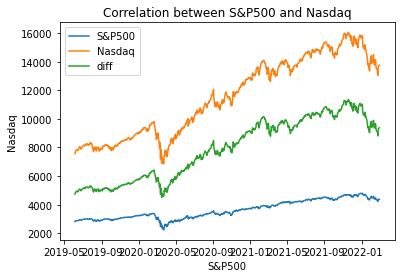

In [ ]:
plt.plot(prices)
plt.title('Correlation between S&P500 and Nasdaq')
plt.xlabel('S&P500')
plt.ylabel('Nasdaq')
plt.legend(['S&P500', 'Nasdaq', 'diff'])
plt.show()

stats
 Symbols        ^GSPC         ^IXIC          diff
count     690.000000    690.000000    690.000000
mean     3631.339329  11530.196472   7898.857143
std       640.712711   2733.160583   2115.841154
min      2237.399902   6860.669922   4518.459961
25%      3053.862488   8706.562256   5698.647461
50%      3450.160034  11511.250000   8052.239868
75%      4247.227417  14024.409668   9820.479858
max      4796.560059  16057.440430  11359.480469 

last price diff 9377.46044921875


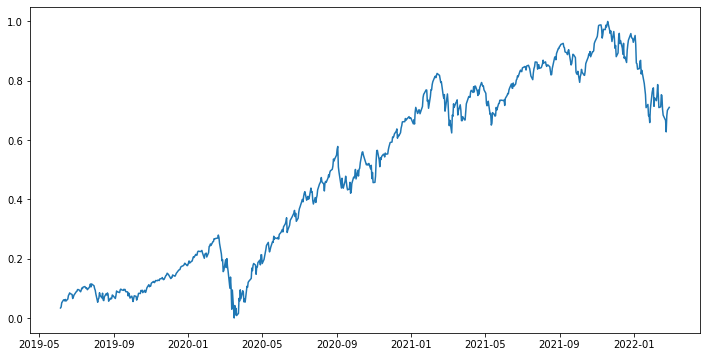

In [ ]:
print('stats\n',prices.describe(), '\n\nlast price diff',prices['diff'][-1])

df = prices['diff']
normalized_df=(df-df.mean())/df.std()
# to use min-max normalization:
mm_normalized_df=(df-df.min())/(df.max()-df.min())

# plt.plot(normalized_df)
plt.figure(figsize=(12,6))
plt.plot(mm_normalized_df)

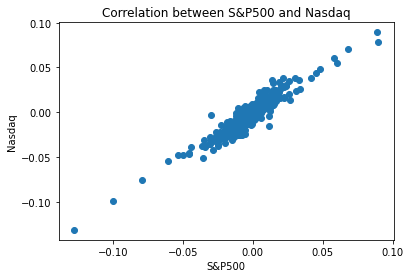

Index Correlation:  Symbols     ^GSPC     ^IXIC
Symbols                    
^GSPC    1.000000  0.943466
^IXIC    0.943466  1.000000
Index Covariance to Volatilty:  Symbols     ^GSPC     ^IXIC
Symbols                    
^GSPC    0.236247  0.241691
^IXIC    0.241691  0.262077
Index Volatility:  Symbols
^GSPC    0.236075
^IXIC    0.261886
dtype: float64


In [ ]:
plt.scatter(log_returns['^GSPC'], log_returns['^IXIC'])
plt.title('Correlation between S&P500 and Nasdaq')
plt.xlabel('S&P500')
plt.ylabel('Nasdaq')
plt.show()
print('Index Correlation: ', corMatrix)
print('Index Covariance to Volatilty: ', np.sqrt(covMatrix)*np.sqrt(252))
print('Index Volatility: ', np.std(log_returns)*np.sqrt(252))

## Trading Opportunities in Equity Index Futures
https://www.cmegroup.com/education/whitepapers/stock-index-spread-opportunities.html

https://www.cmegroup.com/education/courses/introduction-to-equity-index-products/trading-opportunities-in-equity-index-futures.html

In order to construct this spread between Index Futures, we must first calculate a Spread Ratio. The spread ratio is defined as the notional value of one index future divided by the notional value of another.

In this case, we will divide the notional value of the NASDAQ-100 futures by the notional value of the S&P 500 futures.

### Executing the Trade

Example: A portfolio manager (PM) believes the tech sector is at risk versus the broad market. He is willing to express this opinion with a $10 million equivalent risk position, leading the PM to take the following actions:

 - The PM sells the E-mini NASDAQ-100/E- mini S&P 500 spread

In [ ]:
# Parameters
SP500 = 4373.94
NASD = 	13751.40

emini_SP500_x = 50 # $50 per point
emini_NASD_x = 20 # $20 per point

emini_SP500 = SP500*emini_SP500_x
emini_NASD = NASD*emini_NASD_x

spread_ratio = emini_NASD/emini_SP500

print('Notational Value of E-mini S&P500: ', round(emini_SP500,0))
print('Notational Value of E-mini NASDAQ: ', round(emini_NASD,0))
print('Spread Ratio: ', round(spread_ratio,2))

Notational Value of E-mini S&P500:  218697.0
Notational Value of E-mini NASDAQ:  275028.0
Spread Ratio:  1.26


In [ ]:
print('Portfolio Postion: $', 10000000,'\n')

print('Short Postion in E-mini NASDAQ: ', int(10000000/emini_NASD))
print('Long Position in E-mini S&P500: ', int(spread_ratio*10000000/emini_NASD))

Portfolio Postion: $ 10000000 

Short Postion in E-mini NASDAQ:  36
Long Position in E-mini S&P500:  45


## OTHER OPTION: OTC Spread Options on Indices

One of the main uses of Monte Carlo simulation is for pricing options under multiple stochastic factors.

Pricing options whose pay-off depends on multiple asset prices, or with stochastic volatility. Let's consider a European spread option on the difference between two assets (stock indices) $S_1$ and $S_2$ which follow a GBM process.

$dS_1 = (r-\delta_1)S_1dt + \sigma_1S_1dz_1$

$dS_2 = (r-\delta_2)S_2dt + \sigma_2S_2dz_2$

In [ ]:
# Parameters
SP500 = 4373.94
NASD = 	13751.40
div_SP500 = 0.0127
div_NASD = 0.0126
vol_SP500 = 0.143050
vol_NASD = 0.194692
K = 9377 # current difference between index points
T = 1
r = 0.01828 # 10yr US Treasury Bond
rho = 0.922323 # correlation
N = 1 # discrete time steps
M = 1000 # number of simulations

## Slow Steps

In [ ]:
# Precompute constants
dt = T/N
S1 = NASD
S2 = SP500
nu1dt = (r - div_NASD - 0.5*vol_NASD**2)*dt
nu2dt = (r - div_SP500 - 0.5*vol_SP500**2)*dt
vol1sdt = vol_NASD*np.sqrt(dt)
vol2sdt = vol_SP500*np.sqrt(dt)
srho = np.sqrt(1-rho**2)

# Standard Error Placeholders
sum_CT = 0
sum_CT2 = 0

# Monte Carlo Method
for i in range(M):
    St1 = NASD
    St2 = SP500

    for j in range(N):
        dz1 = np.random.normal()
        dz2 = np.random.normal()
        z1 = dz1
        z2 = rho*dz1 + srho*dz2
        St1 = St1*np.exp(nu1dt + vol1sdt*z1)
        St2 = St2*np.exp(nu2dt + vol2sdt*z2)

    CT = max(0, K - (St1 - St2))

    sum_CT = sum_CT + CT
    sum_CT2 = sum_CT2 + CT*CT

# Compute Expectation and SE
C0 = np.exp(-r*T)*sum_CT/M
sigma = np.sqrt( (sum_CT2 - sum_CT*sum_CT/M)*np.exp(-2*r*T) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))

Call value is $786.7 with SE +/- 32.39


## Fast Solution

In [ ]:
# Precompute constants
N=100
dt = T/N
S1 = NASD
S2 = SP500
nu1dt = (r - div_NASD - 0.5*vol_NASD**2)*dt
nu2dt = (r - div_SP500 - 0.5*vol_SP500**2)*dt
vol1sdt = vol_NASD*np.sqrt(dt)
vol2sdt = vol_SP500*np.sqrt(dt)
srho = np.sqrt(1-rho**2)

# Monte Carlo Method
dz1 = np.random.normal(size=(N, M))
dz2 = np.random.normal(size=(N, M))
Z1 = dz1
Z2 = rho*dz1 + srho*dz2
delta_St1 = nu1dt + vol1sdt*Z1
delta_St2 = nu2dt + vol2sdt*Z2
ST1 = S1*np.cumprod( np.exp(delta_St1), axis=0)
ST2 = S2*np.cumprod( np.exp(delta_St2), axis=0)
ST1 = np.concatenate( (np.full(shape=(1, M), fill_value=S1), ST1 ) )
ST2 = np.concatenate( (np.full(shape=(1, M), fill_value=S2), ST2 ) )

CT = np.maximum(0, K - (ST1[-1] - ST2[-1]))
C0 = np.exp(-r*T)*np.sum(CT)/M

sigma = np.sqrt( np.sum( (np.exp(-r*T)*CT - C0)**2) / (M-1) )
SE= sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,3)))

Call value is $840.23 with SE +/- 34.132
